# NBA Players EDA


### Data: Basketball Reference (1982 - 2022)
<!-- <span style="background-color:yellow">MVP features</span> -->
<span style="background-color:lightblue">MVP</span>
<span style="background-color:red">Defensive POTY</span>
<span style="background-color:lightgreen"></span>
- **season**        (Year)
- **player**        (Player Name)
- **pos**           (Position)
- **age**           (Age)
- **team_id**       (Team Abbreviation) _"TOT" means total teams for players who played for multiple teams in one year_
- **g**             (Games Played)
- **gs**            (Games Started)
- **mp_per_g**      (Minutes per Game)
- <span style="background-color:lightblue">**fg_per_g**</span>     (Field Goals per Game)
- **fga_per_g**     (Field Goals Attempted per Game)
- <span style="background-color:lightblue">**fg_pct**</span>        (Field Goal Percentage per Game)
- <span style="background-color:lightblue">**fg3_per_g**</span>     (3pt Shots per Game)
- **fg3a_per_g**    (3pt Shot Attempts per Game)
- <span style="background-color:lightblue">**fg3_pct**</span>       (3pt Percentage per Game)
- <span style="background-color:lightblue">**fg2_per_g**</span>     (2pt Shots per Game)
- **fg2a_per_g**    (2pt Shot Attempts per Game)
- <span style="background-color:lightblue">**fg2_pct**</span>       (2pt Percentage per Game)
- <span style="background-color:lightblue">**efg_pct**</span> (Effective Shooting Percentage per Game) _High Level Stat taking into account num of points scored on each possession_

$$eFG\%=\frac{\text{2pt FG} + (1.5 \times \text{3pt FG})}{FGA}$$

- <span style="background-color:lightblue">**ft_per_g**</span> (Free Throws per Game)
- **fta_per_g** (Free Throw Attempts per Game)
- <span style="background-color:lightblue">**ft_pct**</span> (Free Throw percentage per Game)
- <span style="background-color:red">**orb_per_g**</span> (Offensive Rebounds per Game)
- <span style="background-color:red">**drb_per_g**</span> (Defensive Rebounds per Game)
- <span style="background-color:red">**trb_per_g**</span> (Total Rebounds per Game)
- <span style="background-color:lightblue">**ast_per_g**</span> (Assists per Game)
- <span style="background-color:red">**stl_per_g**</span> (Steals per Game)
- <span style="background-color:red">**blk_per_g**</span> (Blocks per Game)
- <span style="background-color:lightblue">**tov_per_g**</span> (Turnovers per Game)
- **pf_per_g** (Personal Fouls per Game)
- <span style="background-color:lightblue">**pts_per_g**</span> (Points per Game)
- <span style="background-color:red">**mp**</span> (Minutes Played)
- <span style="background-color:lightblue">**per**</span> (Player Efficiency Rating)
- <span style="background-color:lightblue">**ts_pct**</span> (True Shooting Percentage)
$$TS\% = \frac{PTS}{2*(FGA + 0.44*FTA)}$$
- <span style="background-color:lightblue">**fg3a_per_fga_pct**</span> (3pt Shots Attempted per Field Goal Shot Attempted Percentage)
- <span style="background-color:lightblue">**fta_per_fga_pct**</span> (Free Throw Shot Attempted per Field Goal Shot Percentage)
- <span style="background-color:red">**orb_pct**</span> (Offensive Rebound Percentage)
- <span style="background-color:red">**drb_pct**</span> (Defensive Rebound Percentage)
- <span style="background-color:red">**trb_pct**</span> (Total Rebound Percentage)
- <span style="background-color:lightblue">**ast_pct**</span> (Assist Percentage)
- <span style="background-color:red">**stl_pct**</span> (Steal Percentage)
- <span style="background-color:red">**blk_pct**</span> (Block Percentage)
- **tov_pct** (Turnover Percentage)
- <span style="background-color:lightblue">**usg_pct**</span> (Usage Percentage)
- <span style="background-color:lightblue">**ows**</span> (Offensive Win Shares)
- <span style="background-color:red">**dws**</span> (Defensive Win Shares)
- <span style="background-color:lightblue">**ws**</span> (Win Shares) _Estimated Num of Wins contributed by Player_
- **ws_per_48** (Win Shares per 48 Minutes played)
- <span style="background-color:lightblue">**obpm**</span> (Offensive Box +/-)
- <span style="background-color:red">**dbpm**</span> (Defensive Box +/-)
- **bpm** (Box +/-)
- <span style="background-color:lightblue">**vorp**</span> (Value over Replacement Player)
- **award_share** (MVP Voting Win Share Percentage)
- **mov** (Average Margin of Victory during Season)
- **adj_mov** (Average Margin of Victory Adjusted for Opponent Difficulty during Season)
- **win_loss_pct** (Team Win Loss Percentage)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Data

In [2]:
player_data = pd.read_csv('data/rookie_full_total_seasons.csv')

In [3]:
player_data.isna().sum()

Unnamed: 0                0
player                    0
pos                       0
age                       0
team_id                   0
g                         0
gs                        0
mp_per_g                  0
fg_per_g                  0
fga_per_g                 0
fg_pct                    0
fg3_per_g                 0
fg3a_per_g                0
fg3_pct                   0
fg2_per_g                 0
fg2a_per_g                0
fg2_pct                   0
efg_pct                   0
ft_per_g                  0
fta_per_g                 0
ft_pct                    0
orb_per_g                 0
drb_per_g                 0
trb_per_g                 0
ast_per_g                 0
stl_per_g                 0
blk_per_g                 0
tov_per_g                 0
pf_per_g                  0
pts_per_g                 0
mp                        0
per                       0
ts_pct                    0
fg3a_per_fga_pct          0
fta_per_fga_pct           0
orb_pct             

In [4]:
player_data[player_data['player'] == "LeBron James"]

,Unnamed: 0,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
1356,1356,LeBron James,SG,19.0,CLE,79.0,79.0,39.5,7.9,18.9,...,-0.6,1.7,2.9,2004,1,NaN,NaN,NaN,NaN,NaN


In [5]:
dropped_col_df = player_data.drop(columns=['Unnamed: 0'])
df = dropped_col_df.fillna(0.0)

In [6]:
df[df['season'] >= 2017]

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,...,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
2252,Álex Abrines,SG,23.0,OKC,68.0,6.0,15.5,2.0,5.0,0.393,...,-0.4,-1.6,0.1,2017,1,0.0,0.0,0.0,0.0,0.015235
2253,Ron Baker,SG,23.0,NYK,52.0,13.0,16.5,1.6,4.2,0.378,...,-0.3,-4.7,-0.6,2017,1,0.0,0.0,0.0,0.0,0.028505
2254,Wade Baldwin,PG,20.0,MEM,33.0,1.0,12.3,1.1,3.5,0.313,...,0.3,-5.5,-0.3,2017,1,0.0,0.0,0.0,0.0,0.028244
2255,Malik Beasley,SG,20.0,DEN,22.0,1.0,7.5,1.5,3.3,0.452,...,-0.2,-0.6,0.1,2017,1,0.0,0.0,0.0,0.0,0.022201
2256,DeAndre' Bembry,SF,22.0,ATL,38.0,1.0,9.8,1.2,2.6,0.480,...,0.1,-3.5,-0.1,2017,1,0.0,0.0,0.0,0.0,0.018971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,Toumani Camara,PF,23.0,POR,70.0,49.0,24.8,2.8,6.3,0.450,...,0.0,-3.1,-0.5,2024,1,0.0,0.0,0.0,0.0,0.038442
3075,Trayce Jackson-Davis,PF,23.0,GSW,68.0,16.0,16.6,3.4,4.9,0.702,...,1.2,2.8,1.4,2024,1,0.0,0.0,0.0,0.0,0.071659
3076,Trey Jemison,C,24.0,WAS,25.0,14.0,24.9,3.3,5.9,0.551,...,-0.4,-5.1,0.0,2024,1,0.0,0.0,0.0,0.0,0.034239
3077,Vasilije Micić,PG,30.0,OKC,60.0,21.0,27.2,4.1,9.3,0.437,...,-1.4,-4.4,-0.3,2024,1,0.0,0.0,0.0,0.0,0.060590


In [25]:
dropped_columns = ['player', 'pos', 'team_id', 'season', 'svm_distance', 'norm_svm_dist_score', 'first', 'share', 'pca_distance']

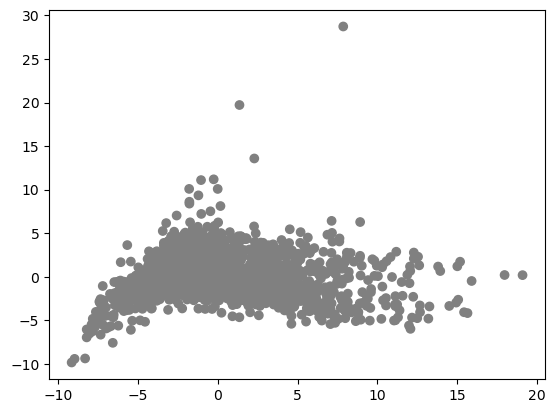

In [26]:
pca = PCA(n_components=2)

data = df[(df['season'] > 2000) & (df['experience'] == 1)].reset_index()
scaled_player_data = StandardScaler().fit_transform(data.drop(columns=dropped_columns))
pca_data = pca.fit_transform(scaled_player_data)
# pca_data = pca.fit_transform(data.drop(columns=['Rk','player', 'pos', 'team_id', 'season']))

color_list = ["grey" for i in range(len(data))]

name_list = list(data['player'])
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=color_list)
# for i, txt in enumerate(name_list):
#     plt.annotate(txt, (pca_data[:, 0][i], pca_data[:, 1][i]))

# data[data['player'] == 'Victor Wembanyama']


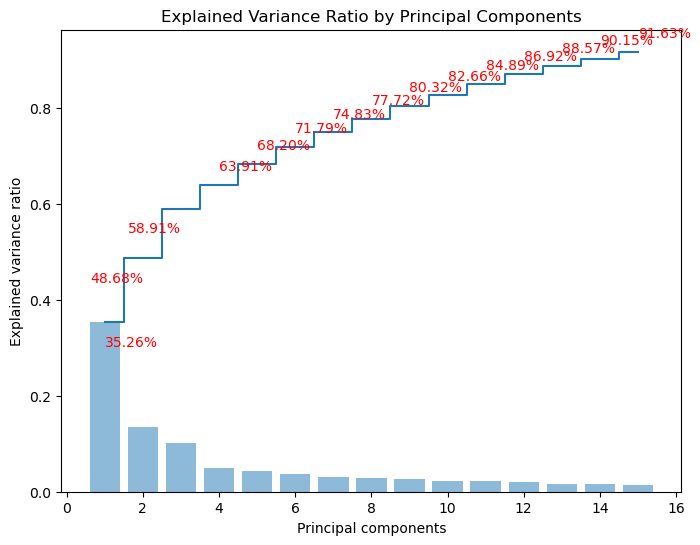

Number of components needed to explain 97.5% of variance: 1


In [45]:
pca = PCA(n_components = 15)
data = df[((df['season'] >= 2004)) & (df['experience'] == 1)]
scaled_player_data = StandardScaler().fit_transform(data.drop(columns=dropped_columns))
pca_data = pca.fit_transform(scaled_player_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by Principal Components')

cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
for i, cevr in enumerate(cumulative_explained_variance_ratio):
    if i == 0:
        plt.text(i + 1, cevr - 0.05, f'{cevr*100:.2f}%', ha='left', color='r')
    else:
        if (cumulative_explained_variance_ratio[i] - cumulative_explained_variance_ratio[i-1]) > 0.1:
            plt.text(i + 1, cevr - 0.05, f'{cevr*100:.2f}%', ha='right', color='r')
        else:
            plt.text(i + 1, cevr + 0.03, f'{cevr*100:.2f}%', ha='left', color='r')

plt.show()

n_components_95 = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1

print(f"Number of components needed to explain 97.5% of variance: {n_components_95}")

In [46]:
dropped_features = ['fg3a_per_g', 'vorp', 'mp_per_g', 'ast_pct', 'fta_per_g', 'fg2a_per_g', 
                    'fg3a_per_g', 'fg_per_g', 'orb_pct', 'drb_pct', 'blk_pct', 'drb_per_g',
                    'fga_per_g', 'trb_pct', 'ws_per_48', 'stl_pct', 'obpm', 'dbpm', 'usg_pct',
                    'age', 'ts_pct', 'g', 'per', 'dws', 'bpm', 'fg_pct', 'fg2_pct', 'ft_per_g',
                    'orb_per_g', 'tov_pct', 'fg3a_per_fga_pct', 'fg2_per_g', 'gs', 'ws',
                    'team_id', 'season', 'fta_per_fga_pct']

(1760, 20)
fg3_per_g     fg3_per_g       1.000000
fg3_pct       fg3_pct         1.000000
mp            mp              1.000000
pts_per_g     pts_per_g       1.000000
pf_per_g      pf_per_g        1.000000
tov_per_g     tov_per_g       1.000000
blk_per_g     blk_per_g       1.000000
ast_per_g     ast_per_g       1.000000
trb_per_g     trb_per_g       1.000000
ft_pct        ft_pct          1.000000
efg_pct       efg_pct         1.000000
stl_per_g     stl_per_g       1.000000
pca_distance  pca_distance    1.000000
pts_per_g     mp              0.826504
mp            pts_per_g       0.826504
pts_per_g     tov_per_g       0.810059
tov_per_g     pts_per_g       0.810059
ast_per_g     tov_per_g       0.799851
tov_per_g     ast_per_g       0.799851
trb_per_g     pf_per_g        0.745584
pf_per_g      trb_per_g       0.745584
trb_per_g     pts_per_g       0.723977
pts_per_g     trb_per_g       0.723977
mp            tov_per_g       0.720076
tov_per_g     mp              0.720076
blk_per_g     

Text(0.5, 1.0, 'NBA Rookies from 2024 and 2004')

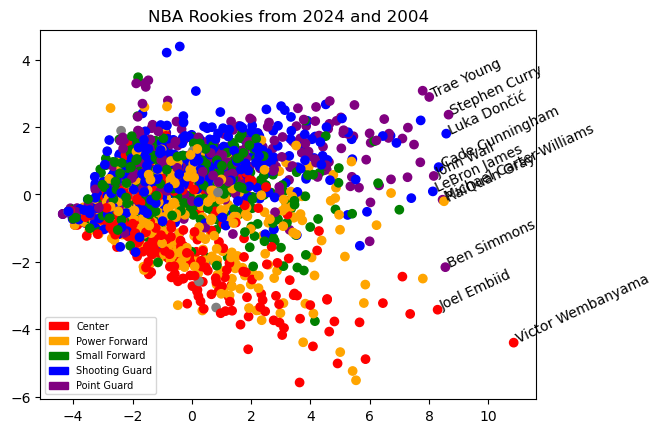

In [51]:
corr_data = data.drop(columns=dropped_features)
corr_matrix = corr_data.iloc[:,2:].corr()
# corr_matrix = corr_matrix[corr_matrix < 1]
highest_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
print(data.drop(columns=dropped_features).shape)
print(highest_corr[:50])
print(corr_data.columns)
pca = PCA(n_components=2)

scaled_player_data = StandardScaler().fit_transform(corr_data.drop(columns=['player', 'pos']))
pca_data = pca.fit_transform(scaled_player_data)
# pca_data = pca.fit_transform(data.drop(columns=['Rk','player', 'pos', 'team_id', 'season']))
def color_player(pos):
    if pos == 'C':
        return 'red'
    elif pos == 'PF':
        return 'orange'
    elif pos == 'SF':
        return 'green'
    elif pos == 'SG':
        return 'blue'
    elif pos == 'PG':
        return 'purple'
    else:
        return 'grey'
color_list = list(corr_data['pos'].apply(color_player))
name_list = list(corr_data['player'])
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=color_list)
df3 = pd.DataFrame(pca_data, columns=["x", "y"])
df3[df3['x'] > 6].index.to_list()
for i, txt in enumerate(name_list):
    if i in df3[df3['x'] > 8].index.to_list():
        plt.annotate(txt, (pca_data[:, 0][i], pca_data[:, 1][i]), rotation=25)
red_patch = mpatches.Patch(color='red', label='Center')
orange_patch = mpatches.Patch(color='orange', label='Power Forward')
green_patch = mpatches.Patch(color='green', label='Small Forward')
blue_patch = mpatches.Patch(color='blue', label='Shooting Guard')
purple_patch = mpatches.Patch(color='purple', label='Point Guard')
plt.legend(handles=[red_patch, orange_patch, green_patch, blue_patch, purple_patch], loc='lower left', fontsize=7)  
plt.title("NBA Rookies from 2024 and 2004")

In [11]:
corr_data

,player,pos,fg3_per_g,fg3_pct,efg_pct,ft_pct,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,mp,experience
19,Tosan Evbuomwan,SF,0.5,0.333,0.472,0.000,2.7,1.0,0.2,0.2,0.2,1.0,2.8,90,1
30,Trey Jemison,C,0.0,0.000,0.487,0.778,3.7,0.8,0.4,1.0,1.0,2.8,4.5,171,1
39,Vasilije Micić,PG,0.5,0.243,0.457,0.765,1.0,3.4,0.4,0.1,1.2,0.9,4.7,590,1
47,Filip Petrušev,C,0.0,0.000,0.500,0.500,0.3,0.0,0.0,0.0,0.0,0.3,1.0,10,1
78,Ibou Badji,C,0.0,0.000,0.632,0.500,2.7,0.7,0.1,1.1,0.8,2.3,1.6,203,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9409,Slavko Vraneš,C,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1
9410,Dwyane Wade,PG,0.3,0.302,0.475,0.747,4.0,4.5,1.4,0.6,3.2,2.3,16.2,2126,1
9418,Luke Walton,PF,0.2,0.333,0.467,0.705,1.8,1.6,0.4,0.1,0.6,1.0,2.4,730,1
9426,David West,PF,0.0,0.000,0.474,0.713,4.2,0.8,0.4,0.4,0.7,1.6,3.8,930,1


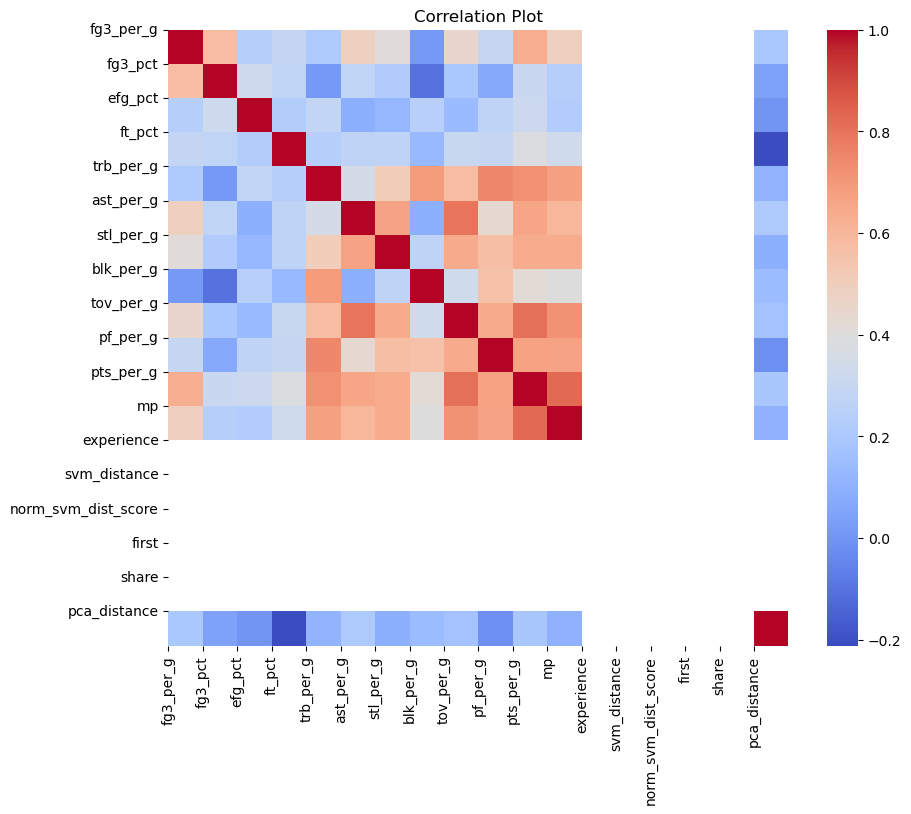

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=0)

plt.title('Correlation Plot')
plt.show()

## ROTY

In [54]:
dropped_features = ['fg3a_per_g', 'vorp', 'mp_per_g', 'ast_pct', 'fta_per_g', 'fg2a_per_g', 
                    'fg3a_per_g', 'fg_per_g', 'orb_pct', 'drb_pct', 'blk_pct', 'drb_per_g',
                    'fga_per_g', 'trb_pct', 'ws_per_48', 'stl_pct', 'obpm', 'dbpm', 'usg_pct',
                    'age', 'ts_pct', 'g', 'per', 'dws', 'bpm', 'fg_pct', 'fg2_pct', 'ft_per_g',
                    'orb_per_g', 'tov_pct', 'fg3a_per_fga_pct', 'fg2_per_g', 'gs', 'ws', 'fta_per_fga_pct']

In [57]:
awards = pd.read_csv('data/AwardVoteShare_2012-2024.csv')

In [58]:
# df8 = awards[(awards['Award'] == 'MVP')]
df8 = awards[(awards['Award'] == 'ROTY')]
# df8.groupby('Year').max()
roty = df8.loc[df8.groupby('Year')['Share'].idxmax()]
roty

,Rank,Player,Age,Team,First,Pts Won,Pts Max,Share,Award,Year
563,1,Damian Lillard,22,POR,121,605,605,1.000,ROTY,12/13
503,1,Michael Carter-Williams,22,PHI,104,569,620,0.918,ROTY,13/14
446,1,Andrew Wiggins,19,MIN,110,604,650,0.929,ROTY,14/15
389,1,Karl-Anthony Towns,20,MIN,130,650,650,1.000,ROTY,15/16
347,1,Malcolm Brogdon,24,MIL,64,414,500,0.828,ROTY,16/17
297,1,Ben Simmons,21,PHI,90,481,505,0.952,ROTY,17/18
251,1,Luka Dončić,19,DAL,98,496,500,0.992,ROTY,18/19
210,1,Ja Morant,20,MEM,99,498,500,0.996,ROTY,19/20
167,1,LaMelo Ball,19,CHO,84,465,495,0.939,ROTY,20/21
122,1,Scottie Barnes,20,TOR,48,378,500,0.756,ROTY,21/22


In [59]:
roty_winners = roty['Player']
roty_winners

563             Damian Lillard
503    Michael Carter-Williams
446             Andrew Wiggins
389         Karl-Anthony Towns
347            Malcolm Brogdon
297                Ben Simmons
251                Luka Dončić
210                  Ja Morant
167                LaMelo Ball
122             Scottie Barnes
68              Paolo Banchero
9            Victor Wembanyama
Name: Player, dtype: object

In [60]:
df

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,...,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
0,Ken Austin,SF,22.0,DET,7.0,0.0,4.0,0.9,1.9,0.462,...,-0.2,-4.9,0.0,1984,1,0.0,0.0,0.0,0.0,0.000000
1,Thurl Bailey,PF,22.0,UTA,81.0,54.0,24.8,3.7,7.3,0.512,...,0.7,-0.5,0.8,1984,1,0.0,0.0,0.0,0.0,0.000000
2,Tom Boswell,PF,30.0,UTA,38.0,0.0,6.9,0.7,1.4,0.538,...,-0.1,-3.1,-0.1,1984,1,0.0,0.0,0.0,0.0,0.000000
3,Randy Breuer,C,23.0,MIL,57.0,8.0,8.3,1.2,3.1,0.384,...,0.5,-5.6,-0.4,1984,1,0.0,0.0,0.0,0.0,0.000000
4,Wallace Bryant,C,24.0,CHI,29.0,0.0,10.9,1.8,4.6,0.391,...,-1.2,-5.4,-0.3,1984,1,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,Toumani Camara,PF,23.0,POR,70.0,49.0,24.8,2.8,6.3,0.450,...,0.0,-3.1,-0.5,2024,1,0.0,0.0,0.0,0.0,0.038442
3075,Trayce Jackson-Davis,PF,23.0,GSW,68.0,16.0,16.6,3.4,4.9,0.702,...,1.2,2.8,1.4,2024,1,0.0,0.0,0.0,0.0,0.071659
3076,Trey Jemison,C,24.0,WAS,25.0,14.0,24.9,3.3,5.9,0.551,...,-0.4,-5.1,0.0,2024,1,0.0,0.0,0.0,0.0,0.034239
3077,Vasilije Micić,PG,30.0,OKC,60.0,21.0,27.2,4.1,9.3,0.437,...,-1.4,-4.4,-0.3,2024,1,0.0,0.0,0.0,0.0,0.060590


12


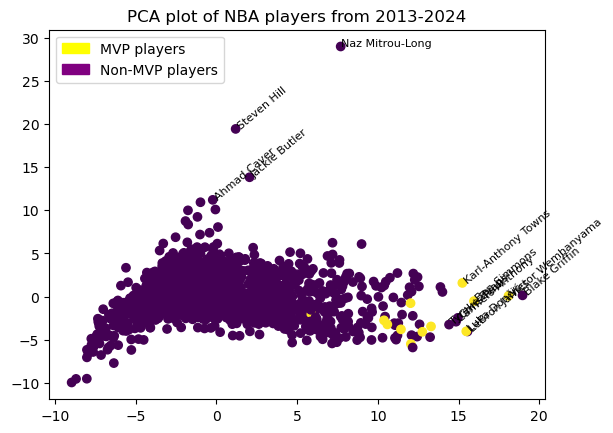

In [109]:
pca = PCA(n_components=2)
# roty_data = df[(df['season'] > 2012) & (df['experience'] == 1) & (df['season'] < 2024)].reset_index()
roty_data = df[(df['season'] > 2002)].reset_index()
roty_data
roty_target = [1 if roty_winners.isin([player]).sum() > 0 else 0 for player in roty_data['player'] ]
# roty_target[80] = 2 # Malcolm Brogdon
# roty_target[181] = 1
# roty_target[324] = 1
# roty_target[391] = 1
# roty_target[409] = 1
# roty_target[585] = 1
# roty_target[642] = 1
# roty_target[786] = 1
# roty_target[835] = 1
# roty_target[929] = 1
# roty_target[1055] = 1
# roty_target[90] = 1
roty_target = np.array(roty_target)
print(sum(roty_target))
scaled_player_data = StandardScaler().fit_transform(roty_data.drop(columns=['player', 'pos', 'team_id', 'season', 'experience']))
pca_data = pca.fit_transform(scaled_player_data)
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(pca_data, roty_target, test_size=0.3,random_state=32) # 70% training and 30% test

name_list = list(roty_data['player'])
df9 = pd.DataFrame(pca_data, columns=["x", "y"])
list1 = df9[df9['x'] > 14].index.to_list()
list2 = df9[df9['y'] > 11].index.to_list()
list1.extend(list2)
for i, txt in enumerate(name_list):
    if i in list1:
        if txt.startswith('Naz'):
            plt.annotate(txt, (pca_data[:, 0][i], pca_data[:, 1][i]), fontsize=8)
        else:
            plt.annotate(txt, (pca_data[:, 0][i], pca_data[:, 1][i]), rotation=40, fontsize=8)
        
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=roty_target)
plt.title("PCA plot of NBA players from 2013-2024")
yellow_patch = mpatches.Patch(color='yellow', label='MVP players')
purple_patch = mpatches.Patch(color='purple', label='Non-MVP players')
plt.legend(handles=[yellow_patch, purple_patch], loc='upper left')    

In [110]:
pca_df = pd.DataFrame(pca_data)
pca_df[pca_df[0] > 15]

,0,1
99,15.554285,-4.040647
568,18.960013,0.138545
986,15.232215,1.579891
1180,15.953190,-0.521010
1237,15.473710,-4.022448
1821,18.090709,0.082245


In [111]:
roty_data.iloc[1,:]

index                          1258
player                 Maceo Baston
pos                              PF
age                            27.0
team_id                         TOR
g                              16.0
gs                              0.0
mp_per_g                        6.6
fg_per_g                        0.9
fga_per_g                       1.6
fg_pct                          0.6
fg3_per_g                       0.0
fg3a_per_g                      0.0
fg3_pct                         0.0
fg2_per_g                       0.9
fg2a_per_g                      1.6
fg2_pct                         0.6
efg_pct                         0.6
ft_per_g                        0.6
fta_per_g                       0.8
ft_pct                        0.833
orb_per_g                       0.3
drb_per_g                       1.2
trb_per_g                       1.4
ast_per_g                       0.0
stl_per_g                       0.3
blk_per_g                       0.7
tov_per_g                   

In [112]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', class_weight=None) # Linear Kernel
# clf = svm.LinearSVC(max_iter=10000, tol=1e-4, C=1)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [113]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9908592321755028


In [114]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))

Precision: 0.0
Recall: 0.0
F1-score: 0.0


/Users/fern/opt/anaconda3/envs/nba_players/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


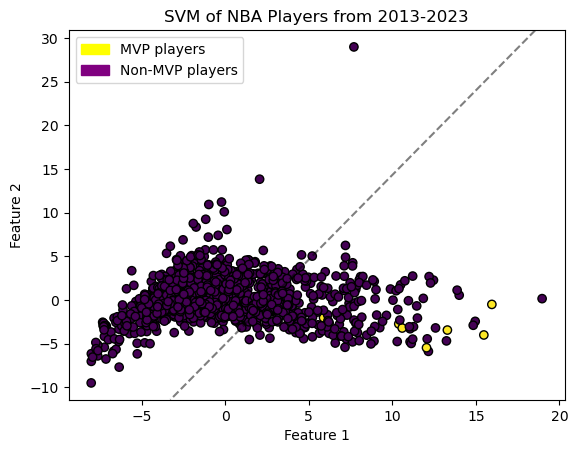

In [101]:
# name_list = list(roty_data['player'])
# df9 = pd.DataFrame(X_train, columns=["x", "y"])
# list1 = df9[df9['x'] > 15].index.to_list()
# list2 = df9[df9['y'] > 10].index.to_list()
# list1.extend(list2)
# for i, txt in enumerate(name_list):
#     if i in list1:
#         plt.annotate(txt, (X_train[:, 0][i], X_train[:, 1][i]))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', label='Training Data')
# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM of NBA Players from 2013-2023')
yellow_patch = mpatches.Patch(color='yellow', label='MVP players')
purple_patch = mpatches.Patch(color='purple', label='Non-MVP players')
plt.legend(handles=[yellow_patch, purple_patch], loc='upper left')

In [102]:
roty_data[roty_data['player'] == 'Mario Chalmers']

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
433,1690,Mario Chalmers,PG,22.0,MIA,82.0,82.0,32.0,3.4,8.1,...,1.1,-0.4,1.0,2009,1,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'SVM Decision Hyperplane')

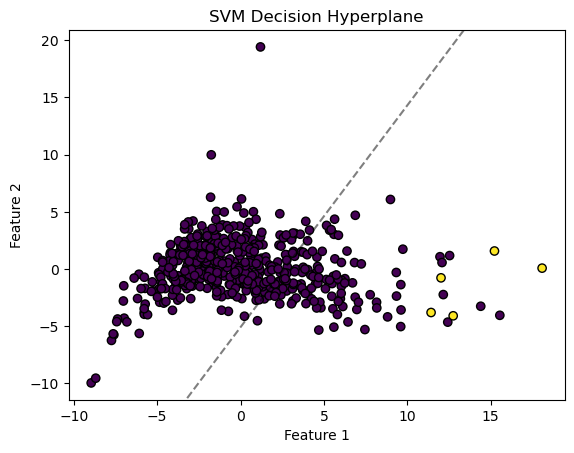

In [103]:
# name_list = list(roty_data['player'])
# df9 = pd.DataFrame(X_test, columns=["x", "y"])
# list1 = df9[df9['x'] > 15].index.to_list()
# list2 = df9[df9['y'] > 10].index.to_list()
# list1.extend(list2)
# for i, txt in enumerate(name_list):
#     if i in list1:
#         plt.annotate(txt, (X_test[:, 0][i], X_test[:, 1][i]))

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', edgecolors='k', label='Test Data')
# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Hyperplane')
    

In [104]:
clf.class_weight_

array([1., 1.])

In [105]:
w_norm = np.linalg.norm(clf.coef_)
# dist = Z / w_norm
# dist
clf.decision_function(pca_data) / w_norm

array([-69683.76612851, -69683.60206761, -69688.40707078, ...,
       -69688.72131172, -69692.49733151, -69703.06575534])

In [106]:
roty_data['svm_distance'] = clf.decision_function(pca_data) / w_norm

In [107]:
roty_data

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
0,1257,Robert Archibald,PF,22.0,MEM,12.0,0.0,6.0,0.5,1.7,...,-3.3,-12.0,-0.2,2003,1,-69683.766129,0.0,0.0,0.0,0.000000
1,1258,Maceo Baston,PF,27.0,TOR,16.0,0.0,6.6,0.9,1.6,...,2.7,1.0,0.1,2003,1,-69683.602068,0.0,0.0,0.0,0.000000
2,1259,Mike Batiste,PF,25.0,MEM,75.0,2.0,16.6,2.6,6.2,...,-1.4,-3.5,-0.5,2003,1,-69688.407071,0.0,0.0,0.0,0.000000
3,1260,Lonny Baxter,C,24.0,CHI,55.0,0.0,12.4,1.7,3.7,...,-1.4,-5.4,-0.6,2003,1,-69686.593040,0.0,0.0,0.0,0.000000
4,1261,Carlos Boozer,PF,21.0,CLE,81.0,54.0,25.3,4.1,7.6,...,-0.6,0.0,1.0,2003,1,-69693.104771,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,3074,Toumani Camara,PF,23.0,POR,70.0,49.0,24.8,2.8,6.3,...,0.0,-3.1,-0.5,2024,1,-69691.116918,0.0,0.0,0.0,0.038442
1818,3075,Trayce Jackson-Davis,PF,23.0,GSW,68.0,16.0,16.6,3.4,4.9,...,1.2,2.8,1.4,2024,1,-69689.354569,0.0,0.0,0.0,0.071659
1819,3076,Trey Jemison,C,24.0,WAS,25.0,14.0,24.9,3.3,5.9,...,-0.4,-5.1,0.0,2024,1,-69688.721312,0.0,0.0,0.0,0.034239
1820,3077,Vasilije Micić,PG,30.0,OKC,60.0,21.0,27.2,4.1,9.3,...,-1.4,-4.4,-0.3,2024,1,-69692.497332,0.0,0.0,0.0,0.060590


In [108]:
roty_data.loc[roty_data.groupby('season')['svm_distance'].idxmax()]

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
44,1301,Guy Rucker,PF,25.0,GSW,3.0,0.0,1.3,0.0,0.0,...,7.2,5.6,0.0,2003,1,-69681.816567,0.0,0.0,0.0,0.000000
66,1323,Jerome Beasley,PF,23.0,MIA,2.0,0.0,2.5,0.5,1.5,...,-3.4,-5.2,0.0,2004,1,-69682.408845,0.0,0.0,0.0,0.000000
139,1396,Geno Carlisle,SG,28.0,POR,6.0,0.0,2.7,0.3,0.5,...,-2.3,0.6,0.0,2005,1,-69682.351613,0.0,0.0,0.0,0.000000
200,1457,Martynas Andriuškevičius,C,19.0,CLE,6.0,0.0,1.5,0.0,0.2,...,7.0,5.2,0.0,2006,1,-69681.403489,0.0,0.0,0.0,0.000000
328,1585,Ivan McFarlin,PF,24.0,PHI,11.0,0.0,3.7,0.5,1.2,...,-3.8,-5.2,0.0,2007,1,-69682.782820,0.0,0.0,0.0,0.000000
409,1666,Courtney Sims,C,24.0,IND,3.0,0.0,3.7,0.0,0.3,...,-1.6,-7.5,0.0,2008,1,-69682.176125,0.0,0.0,0.0,0.000000
449,1706,Steven Hill,PF,23.0,OKC,1.0,0.0,2.0,1.0,1.0,...,-0.9,29.2,0.0,2009,1,-69679.185808,0.0,0.0,0.0,0.000000
510,1767,Trey Gilder,SF,25.0,MEM,2.0,0.0,2.5,0.5,0.5,...,13.6,21.2,0.0,2010,1,-69681.319574,0.0,0.0,0.0,0.000000
580,1837,Gani Lawal,PF,22.0,PHO,1.0,0.0,2.0,0.0,0.0,...,1.9,-15.0,0.0,2011,1,-69682.157871,0.0,0.0,0.0,0.000000
610,1867,Keith Benson,C,23.0,GSW,3.0,0.0,3.0,0.0,0.3,...,-6.3,-7.7,0.0,2012,1,-69681.715037,0.0,0.0,0.0,0.057485


## Apply distance score to all rookies and normalize per season

In [120]:
pca = PCA(n_components=2)
# final_roty_data = df[(df['season'] > 2012) & (df['experience'] == 1)].reset_index()
final_roty_data = df[(df['season'] == 2024)].reset_index()
scaled_player_data = StandardScaler().fit_transform(final_roty_data.drop(columns=['player', 'pos', 'team_id', 'season']))
final_pca_data = pca.fit_transform(scaled_player_data)
final_roty_data['svm_distance'] = clf.decision_function(final_pca_data) / w_norm
final_roty_data['norm_svm_dist_score'] = final_roty_data.apply(lambda x: x['svm_distance'] - final_roty_data.groupby('season')['svm_distance'].mean()[x['season']], axis=1)
final_roty_data.loc[final_roty_data.groupby('season')['svm_distance'].idxmax()]

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score
168,168,Luka Dončić,PG,24,DAL,53,53,37.5,11.7,23.7,...,9.3,0.226,8.6,1.5,10.1,6.1,2024,6,2.640636,14.792391


In [121]:
final_roty_data[final_roty_data['season'] == 2024].sort_values('norm_svm_dist_score', ascending=False)[:50]

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score
168,168,Luka Dončić,PG,24,DAL,53,53,37.5,11.7,23.7,...,9.3,0.226,8.6,1.5,10.1,6.1,2024,6,2.640636,14.792391
71,71,Giannis Antetokounmpo,PF,29,MIL,59,59,34.9,11.5,18.6,...,11.0,0.257,6.8,2.3,9.1,5.8,2024,11,1.912103,14.063858
180,180,Joel Embiid,C,29,PHI,34,34,34.0,11.8,22.2,...,6.7,0.279,8.9,3.0,11.9,4.1,2024,8,1.842642,13.994397
282,282,Nikola Jokić,C,28,DEN,59,59,34.0,10.2,17.6,...,12.6,0.301,9.4,4.5,13.8,8.1,2024,9,1.567007,13.718762
201,201,Shai Gilgeous-Alexander,PG,25,OKC,59,59,34.5,11.1,20.2,...,12.7,0.300,7.4,2.7,10.1,6.2,2024,6,1.308940,13.460695
157,157,Anthony Davis,C,30,LAL,58,58,35.8,9.6,17.1,...,8.9,0.205,3.4,1.6,5.0,3.7,2024,12,-1.117845,11.033910
480,480,Jayson Tatum,PF,25,BOS,57,57,35.7,9.2,19.2,...,8.4,0.197,4.6,1.0,5.5,3.8,2024,7,-1.328645,10.823109
359,359,Donovan Mitchell,SG,27,CLE,47,47,35.7,9.7,20.4,...,6.4,0.183,5.2,1.5,6.6,3.7,2024,7,-1.422731,10.729024
174,174,Kevin Durant,PF,35,PHO,54,54,37.2,10.1,19.1,...,6.6,0.158,4.7,0.2,4.9,3.5,2024,17,-1.453458,10.698297
441,441,Domantas Sabonis,C,27,SAC,59,59,35.8,8.1,13.1,...,9.2,0.208,4.4,2.2,6.6,4.6,2024,8,-1.737294,10.414461


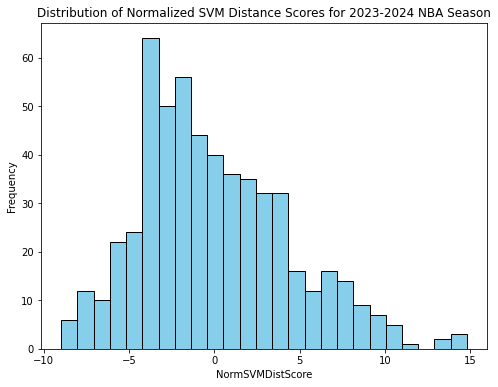

In [82]:
plt.figure(figsize=(8, 6))
plt.hist(final_roty_data['norm_svm_dist_score'], bins=25, color= 'skyblue',edgecolor='black')
plt.title('Distribution of Normalized SVM Distance Scores for 2023-2024 NBA Season')
plt.xlabel('NormSVMDistScore')
plt.ylabel('Frequency')
plt.show()

## Join voting share to rookie table

In [31]:
df8

,Rank,Player,Age,Team,First,Pts Won,Pts Max,Share,Award,Year
13,1,Paolo Banchero,20,ORL,98,494,500,0.988,ROTY,22/23
14,2,Jalen Williams,21,OKC,0,241,500,0.482,ROTY,22/23
15,3,Walker Kessler,21,UTA,2,114,500,0.228,ROTY,22/23
16,4,Bennedict Mathurin,20,IND,0,27,500,0.054,ROTY,22/23
17,5,Keegan Murray,22,SAC,0,21,500,0.042,ROTY,22/23
...,...,...,...,...,...,...,...,...,...,...
513,6T,Harrison Barnes,20,GSW,0,8,605,0.013,ROTY,12/13
514,6T,Chris Copeland,28,NYK,0,8,605,0.013,ROTY,12/13
515,8,Michael Kidd-Gilchrist,19,CHA,0,3,605,0.005,ROTY,12/13
516,9,Jonas Valančiūnas,20,TOR,0,2,605,0.003,ROTY,12/13


In [32]:
new_df = pd.merge(final_roty_data, df8, left_on=['player', 'age'], right_on=['Player','Age'], how='left', suffixes=[None, "_new"])
new2 = new_df.drop(columns=['Rank ','Player','Age','Team','Pts Won','Pts Max','Award', 'Year'])
new2['first'] = new2.apply(lambda x: 0.0 if (x['season'] != 2024 and np.isnan(x['Share'])) else x['First'], axis=1)
new2['share'] = new2.apply(lambda x: 0.0 if (x['season'] != 2024 and np.isnan(x['Share'])) else x['Share'], axis=1)


In [33]:
final_rookie = new2.drop(columns=["First", "Share"])
final_rookie

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,obpm,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share
0,19,Tosan Evbuomwan,SF,22,TOT,6,0,15.0,1.2,3.0,...,-3.1,-1.4,-4.5,-0.1,2024,1,-14.749858,-1.118402,NaN,NaN
1,30,Trey Jemison,C,24,TOT,10,4,17.1,1.9,3.9,...,-6.9,-0.1,-7.1,-0.2,2024,1,-12.731156,0.900300,NaN,NaN
2,39,Vasilije Micić,PG,30,TOT,40,1,14.8,1.8,4.4,...,-3.4,-1.8,-5.2,-0.5,2024,1,-12.382941,1.248515,NaN,NaN
3,47,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,...,-4.8,-3.4,-8.1,0.0,2024,1,-17.114631,-3.483174,NaN,NaN
4,78,Ibou Badji,C,21,POR,18,1,11.3,0.7,1.1,...,-7.7,2.2,-5.6,-0.2,2024,1,-14.997147,-1.365690,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,18763,Jalen Williams,SG,21,OKC,75,62,30.3,5.5,10.6,...,-0.4,0.7,0.3,1.3,2023,1,-3.519178,8.818581,0.0,0.482
1130,18764,Jaylin Williams,C,20,OKC,49,36,18.7,2.1,4.8,...,-2.3,0.6,-1.7,0.1,2023,1,-10.151387,2.186371,0.0,0.000
1131,18765,Jeenathan Williams,SG,23,POR,5,4,25.4,4.8,7.8,...,-1.0,-2.1,-3.0,0.0,2023,1,-10.413069,1.924690,0.0,0.000
1132,18767,Mark Williams,C,21,CHO,43,17,19.3,3.7,5.8,...,-0.5,0.6,0.1,0.4,2023,1,-9.393348,2.944411,0.0,0.000


In [40]:
final_rookie = final_rookie.fillna(0.0)
final_rookie.to_csv('rookie_data_3_28_2024.csv')

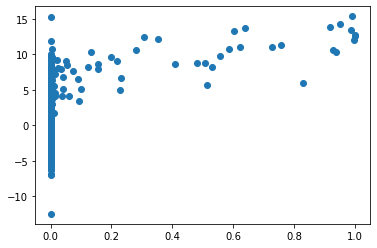

In [41]:
plt.scatter(final_rookie['share'], final_rookie['norm_svm_dist_score'])

In [73]:
final_rookie[final_rookie['share'] > 0.8].iloc[:, [1,2,3,4,5,6,7,8,9,10,52,53,55]]
# final_rookie[final_rookie['norm_svm_dist_score'] < -1].iloc[:, [1,2,3,4,5,6,7,8,9,10,52,53,55]]

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,svm_distance,norm_svm_dist_score,share
132,Damian Lillard,PG,22,POR,82,82,38.6,6.7,15.7,0.429,0.266038,12.764429,1.000
181,Michael Carter-Williams,PG,22,PHI,70,70,34.5,6.1,15.1,0.405,0.652922,13.808146,0.918
324,Andrew Wiggins,SF,19,MIN,82,82,36.2,6.1,13.9,0.437,-1.876692,10.660917,0.929
391,Karl-Anthony Towns,C,20,MIN,82,82,32.0,7.6,14.1,0.542,0.252125,12.619337,1.000
409,Malcolm Brogdon,SG,24,MIL,75,28,26.4,3.9,8.5,0.457,-6.623172,5.982638,0.828
585,Ben Simmons,PG,21,PHI,81,81,33.7,6.7,12.3,0.545,1.685421,14.281238,0.952
642,Luka Dončić,SG,19,DAL,72,72,32.2,7.0,16.5,0.427,2.678040,15.353803,0.992
786,Ja Morant,PG,20,MEM,67,67,31.0,6.7,14.0,0.477,-0.874387,11.961652,0.996
835,LaMelo Ball,PG,19,CHO,51,31,28.8,5.7,13.2,0.436,-1.972012,10.348876,0.939
1055,Paolo Banchero,PF,20,ORL,72,72,33.8,6.7,15.6,0.427,1.041338,13.379096,0.988


In [49]:
dropped_features = ['fg3a_per_g', 'mp_per_g', 'ast_pct', 'fta_per_g', 'fg2a_per_g', 
                    'fg3a_per_g', 'fg_per_g', 'orb_pct', 'drb_pct', 'blk_pct', 'drb_per_g',
                    'fga_per_g', 'trb_pct', 'ws_per_48', 'stl_pct', 'obpm', 'dbpm', 'usg_pct',
                    'age', 'ts_pct', 'dws', 'bpm', 'fg_pct', 'fg2_pct', 'ft_per_g',
                    'orb_per_g', 'tov_pct', 'fg3a_per_fga_pct', 'fg2_per_g', 'gs', 'ws', 'fta_per_fga_pct']

In [2]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 1: Prepare your data
X = final_rookie.drop(columns=['index', 'player', 'pos', 'team_id', 'season', 'experience', 'first', 'share', 'svm_distance'])
# Drop the 'won_dpoy' column to create the feature matrix
# X = X.drop(columns=dropped_features)
y = final_rookie['share']  # Select only the 'won_dpoy' column as the target variable

# Step 2: Import libraries

# Step 3: Instantiate the Random Forest model
rf_model = RandomForestRegressor()

# Step 4: Fit the model to your data
rf_model.fit(X, y)

# Step 5: Retrieve feature importances
feature_importances = rf_model.feature_importances_

# Step 6: Pair feature importances with feature names
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Step 7: Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Visualize the importance of features using a bar plot
# Extract feature names and importances
features, importances = zip(*sorted_features)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance for ROTY')
plt.show()

NameError: name 'final_rookie' is not defined

NameError: name 'X' is not defined